<h1> NLP Analysis </h1>

In this notebook, I will analyze the poem:

<h2>Aedh Wishes for the Cloths of Heaven</h2>
W. B. Yeats - 1865-1939<br>

Had I the heavens' embroidered cloths,<br>
Enwrought with golden and silver light,<br>
The blue and the dim and the dark cloths<br>
Of night and light and the half light,<br>
I would spread the cloths under your feet:<br>
But I, being poor, have only my dreams;<br>
I have spread my dreams under your feet;<br>
Tread softly because you tread on my dreams.<br>


source: https://poets.org/poem/aedh-wishes-cloths-heaven

<h2> Activity 1 Stemming and Lemmatizing</h2>

Install libraries that I use for NLP and import them

In [1]:
import sys
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install wordcloud
import nltk

Create a poem list of words from the text that I will work with by using word_tokenize function on text

In [2]:
text = "Had I the heavens' embroidered cloths, Enwrought with golden and silver light, The blue and the dim and the dark cloths Of night and light and the half light, I would spread the cloths under your feet: But I, being poor, have only my dreams; I have spread my dreams under your feet; Tread softly because you tread on my dreams."
# This is a list
poem = nltk.word_tokenize(text)
print (poem)

['Had', 'I', 'the', 'heavens', "'", 'embroidered', 'cloths', ',', 'Enwrought', 'with', 'golden', 'and', 'silver', 'light', ',', 'The', 'blue', 'and', 'the', 'dim', 'and', 'the', 'dark', 'cloths', 'Of', 'night', 'and', 'light', 'and', 'the', 'half', 'light', ',', 'I', 'would', 'spread', 'the', 'cloths', 'under', 'your', 'feet', ':', 'But', 'I', ',', 'being', 'poor', ',', 'have', 'only', 'my', 'dreams', ';', 'I', 'have', 'spread', 'my', 'dreams', 'under', 'your', 'feet', ';', 'Tread', 'softly', 'because', 'you', 'tread', 'on', 'my', 'dreams', '.']


<h3>Stemming - finds the root word</h3>

Import module necessary for stemming

In [3]:
from nltk.stem import PorterStemmer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nilph\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Stemm the list

In [4]:
ps=PorterStemmer()
for w in poem:
    rootWord=ps.stem(w)
    print(rootWord)

had
i
the
heaven
'
embroid
cloth
,
enwrought
with
golden
and
silver
light
,
the
blue
and
the
dim
and
the
dark
cloth
of
night
and
light
and
the
half
light
,
i
would
spread
the
cloth
under
your
feet
:
but
i
,
be
poor
,
have
onli
my
dream
;
i
have
spread
my
dream
under
your
feet
;
tread
softli
becaus
you
tread
on
my
dream
.


<h3>Lemmatizing - finding a (meaningful) word that is synonymous and has meaning</h3>

Import the module for lemmatization from nltk library I installed earlier

In [5]:
from nltk.stem import WordNetLemmatizer

Lemmatize the list

In [6]:
wordnet_lemmatizer = WordNetLemmatizer()
for w in poem:
    lemma=wordnet_lemmatizer.lemmatize(w)
    print(lemma)

Had
I
the
heaven
'
embroidered
cloth
,
Enwrought
with
golden
and
silver
light
,
The
blue
and
the
dim
and
the
dark
cloth
Of
night
and
light
and
the
half
light
,
I
would
spread
the
cloth
under
your
foot
:
But
I
,
being
poor
,
have
only
my
dream
;
I
have
spread
my
dream
under
your
foot
;
Tread
softly
because
you
tread
on
my
dream
.


Conclusion: Lemmatization and stemming brought up similar results. Stemming did a good job with the complicated word embroidered where embroid was correctly found as a root word. Stemming created silly word roots like onli, becaus, or softli, which are not a real words. Because the words in poem are simple, lemmatizing did show very few synonyms, for example feet - foot, being - be. Lemmatizing had a difficulty to find the synonym for Enwrought, it could be because the word is not used that frequently and might not be present or registered in the used library containing WordNetLemmatizer. Roughly comparing Lemmatization and stemming, in number of errors and successful results it seems equal in effectivity.

<h2> Activity 2 Term frequency</h2>

Install necessary modules for word frequency, stopwords and plotting

In [7]:
nltk.download('stopwords')

# This will import stopwords.
from nltk.corpus import stopwords

# This will import frequency distribution.
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nilph\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Look at the word list without and with stopwords and plot the frequency distribution

Without stop words: ['heavens', 'embroidered', 'cloths', 'enwrought', 'golden', 'silver', 'light', 'blue', 'dim', 'dark', 'cloths', 'night', 'light', 'half', 'light', 'spread', 'cloths', 'feet', 'poor', 'dreams', 'spread', 'dreams', 'feet', 'tread', 'softly', 'tread', 'dreams', '.']
With stop words: ['had', 'i', 'the', 'heavens', 'embroidered', 'cloths', 'enwrought', 'with', 'golden', 'and', 'silver', 'light', 'the', 'blue', 'and', 'the', 'dim', 'and', 'the', 'dark', 'cloths', 'of', 'night', 'and', 'light', 'and', 'the', 'half', 'light', 'i', 'would', 'spread', 'the', 'cloths', 'under', 'your', 'feet', 'but', 'i', 'being', 'poor', 'have', 'only', 'my', 'dreams', 'i', 'have', 'spread', 'my', 'dreams', 'under', 'your', 'feet', 'tread', 'softly', 'because', 'you', 'tread', 'on', 'my', 'dreams', '.']
<FreqDist with 36 samples and 62 outcomes>


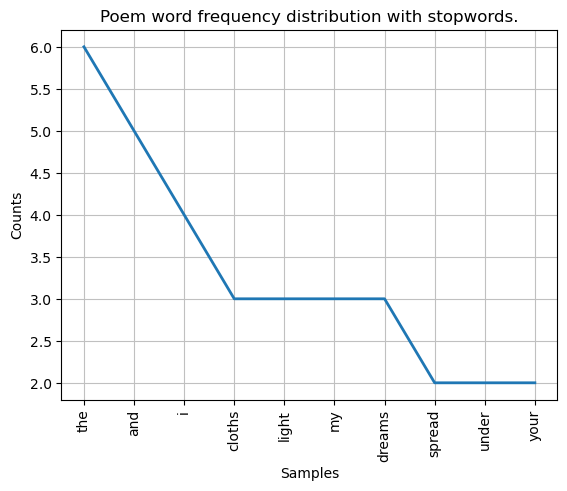

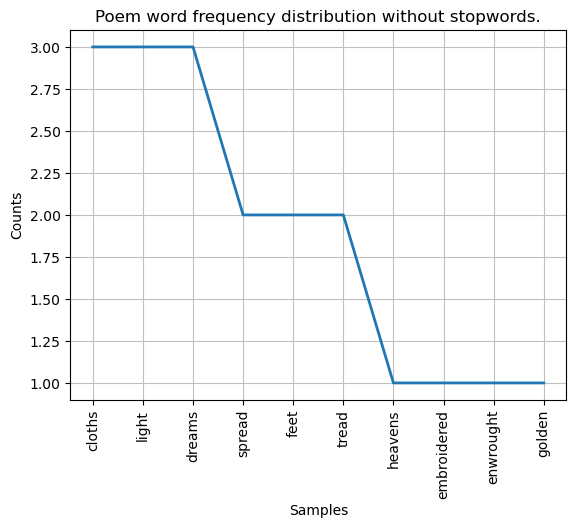

<AxesSubplot:title={'center':'Poem word frequency distribution without stopwords.'}, xlabel='Samples', ylabel='Counts'>

In [8]:
# Standardise the text to lowercase using sentence.lower() 
sentence = text.lower()

# Remove commas and other punctuation from the sentence to make results relevant
sentenceWithoutCommas = str(sentence).replace(',', '').replace(':', '').replace(';', '').replace("'", '')

# Tokenize the sentence.
tokens = nltk.tokenize.word_tokenize(sentenceWithoutCommas)

# This is one way to remove stopwords
filtered = [word for word in tokens if not word in stopwords.words()]
print("Without stop words:", filtered)

# Calculate frequency distribution 
f_dist = FreqDist(tokens)

print("With stop words:", tokens)
print(f_dist)

# Plot the data we have in a relatively simple manner, either with or without stopwords
# Frequency distribution with stopwords
import matplotlib.pyplot as plt
fds = nltk.FreqDist(tokens)

# Feed the plot all '10' words as a parameter for the plot
# Set cumulative as 'false'
fds.plot(10, cumulative = False, title = "Poem word frequency distribution with stopwords.")

# Frequency distribution without stopwords (stop words don`t carry meaning)
fd = nltk.FreqDist(filtered)
fd.plot(10, cumulative = False, title = "Poem word frequency distribution without stopwords.")

Conclusion: I created list of words in poem without and with stopwords and counted the frequency of words in the poem, counting first 10 most frequently used words. I have created the frequency distribution graph for cases with and without stopwords. One of the most frequently occuring symbols in the results was not a word, it was a comma. I got rid of all commas, colons, semicolons and apostrophe to make the result more relevant. The most frequent words that are not stop words are cloths, light and dreams.

<h2> Activity 3 Sentiment analysis</h2>

Import the sentiment analysis module

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# load the Lexicon that quantifies polar sentiment (positive/negative)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nilph\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Analyze the sentiment in the poem

In [10]:
analyzer=SentimentIntensityAnalyzer()

analyzer.polarity_scores(sentenceWithoutCommas)

{'neg': 0.06, 'neu': 0.757, 'pos': 0.182, 'compound': 0.81}

Conclusion: The poems sentiment analysis is mostly neutral and slightly positive.

<h2> Activity 4 High level visualisations for narrative</h2>

Import the word cloud module

In [11]:
from wordcloud import WordCloud

Create the word cloud from the poem

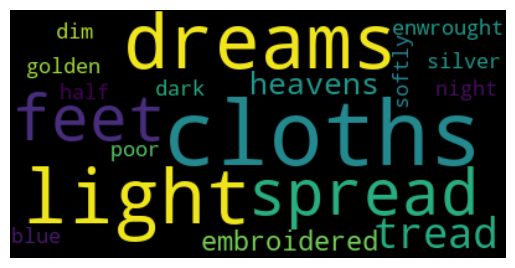

In [12]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(sentenceWithoutCommas)

# Display the generated word cloud image
# Bilinear interpolation is a way to spread the words out without them bumping into one another
plt.imshow(wordcloud, interpolation='bilinear')

# Hide axis values
plt.axis("off")

# Show the plot
plt.show()

<h2>Concusion</h2>

<p>I have analysed poem Aedh Wishes for the Cloths of Heaven written by W. B. Yeats, that you might recognize from popular movie Equilibrium.</p>
<p>I have combined the techniques of stemming, lemmatizing, found the term frequency, discovered the sentiment analysis and generated the word cloud for this one sentence poem.</p>
<p>I have chosen threshold value of 10 for frequency, because several words repeat there several times and lower value would not show the frequency at the approriate scale.</p>
<p>I have removed punctuation as extra step in frequency distribution to make the results accurate, I found 3 most frequnt words carryning the meaning cloths, light and dreams.</p>


